In [73]:
%pip install pandas
%pip install numpy
%pip install beautifulsoup4
%pip install requests

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

### Making a get request to rotten tomatoes

In [76]:
url = 'https://www.rottentomatoes.com/'
get_req = requests.get(url)
html_body = get_req.text

### Working with Beautiful Soup

In [77]:
soup = BeautifulSoup(html_body, 'html.parser')
sections = soup.find_all('section')


### Looping through section to find section of interest

In [80]:
for i,s in enumerate(sections):
    h2_tag = s.find('h2')
    if h2_tag:
        if h2_tag.string == f"NEW & UPCOMING MOVIES IN THEATERS".lower():
            section_index = i
            break
            
print(section_index)            

2


### Working to display section of interest and storing the data we're interested in in a map

In [81]:
movies = {
    'name' : [], 
    'images' : [],
    'rating': []
}

for i in sections[section_index].select('a .p--small'):
    movies['name'].append(i.string)

for i in sections[section_index].select('rt-img'):
    movies['images'].append(i.attrs['src'])  
for i in sections[section_index].select('a score-pairs-deprecated'):
    movies['rating'].append(i.attrs['criticsscore'])  

    

In [82]:
df = pd.DataFrame(movies)
#convert rating column from str(object) to float
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')


In [83]:
df.drop_duplicates(inplace=True)
df.drop(df['rating'].isna().sum(), inplace=True)
df.shape

(86, 3)

### Top Ten Highest Rated movies

In [85]:
df.sort_values(by='rating', ascending=False).head(10)

,name,images,rating
23,Evil,https://resizing.flixster.com/IHH7WdK3PmFjhhF5...,100.0
101,A Brighter Summer Day,https://resizing.flixster.com/LU9FpomFEKPzlhlm...,100.0
80,"LaRoy, Texas",https://resizing.flixster.com/Plm14ATMekCMgi6k...,100.0
87,Nowhere Special,https://resizing.flixster.com/2aSReQ3wORLcrl1P...,100.0
34,Them,https://resizing.flixster.com/661wyDIDSF7DRgBn...,100.0
93,Seven Samurai,https://resizing.flixster.com/fsIHET3BY_Zb2Awb...,100.0
35,Welcome to Wrexham,https://resizing.flixster.com/01aVGghLRpsKICRk...,100.0
28,X-Men '97,https://resizing.flixster.com/4BVOdUDKUZZFYYTc...,99.0
26,Interview With the Vampire,https://resizing.flixster.com/ltCwyDCY-pZ2W-5R...,98.0
75,A House Made of Splinters,https://resizing.flixster.com/EulUt6IdZZ33xu9b...,98.0


### Bottom 10 Lowest rated movies

In [86]:
df.sort_values(by='rating').head(10)

,name,images,rating
14,Not Another Church Movie,https://resizing.flixster.com/u4kT3aBkP9LdcHq2...,11.0
5,The Strangers: Chapter 1,https://resizing.flixster.com/GfA-jUJTDfaI5VLY...,20.0
18,Tarot,https://resizing.flixster.com/yFF-y5yZ6-7Wv6d5...,20.0
16,Poolman,https://resizing.flixster.com/Ip73-zdzCyXcRLAv...,22.0
10,Back to Black,https://resizing.flixster.com/TlbUCBj4PMtmgO9k...,34.0
1,The Garfield Movie,https://resizing.flixster.com/8830tX2h1RGoUyDn...,37.0
53,Ghostbusters: Frozen Empire,https://resizing.flixster.com/YM6QHIYrvS4SeGci...,43.0
47,Godzilla x Kong: The New Empire,https://resizing.flixster.com/CcYVznD9uHiBUV80...,54.0
19,Unsung Hero,https://resizing.flixster.com/sUvzOOUhjn6v_Wrn...,59.0
3,Sight,https://resizing.flixster.com/CYN1PKYpAMSqgJiw...,63.0


<Axes: xlabel='Name', ylabel='Rating'>

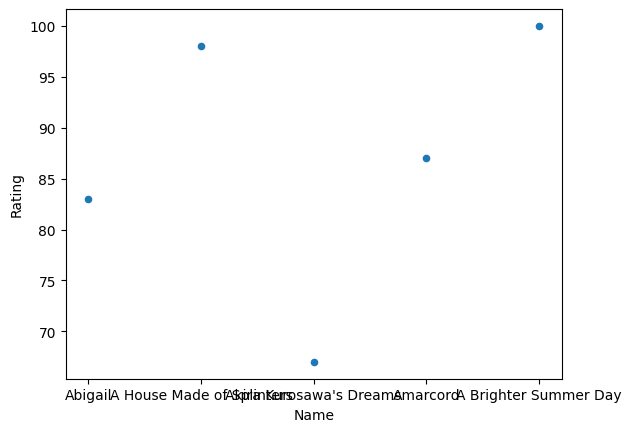

In [88]:
df[df['name'].str.startswith('A')].plot(kind='scatter',x='name',y='rating', ylabel='Rating', xlabel='Name')